In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task 2: Computer Vision

**Goal:**

Develop a model which can detect the difference between two images and draw bounding boxes around the detected differences.

**Objective:**
Use any suitable computer vision technique to identify the difference between two images.
The model should take two input images, identify areas with difference, and draw a bounding box around each area where it detects a difference.
Also calculate and print a similarity score to evaluate your model.
You may use traditional computer vision techniques or deep learning models.


In [2]:
from google.colab.patches import cv2_imshow
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

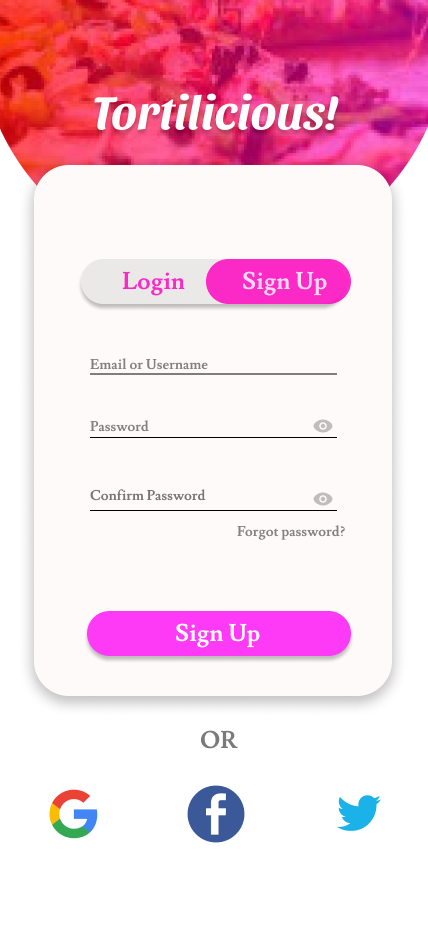

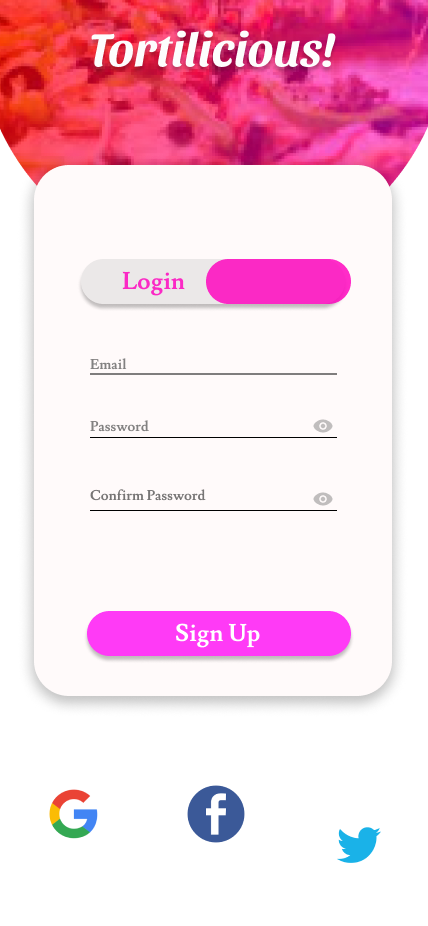

In [8]:
# Load images
image1 = cv2.imread("/content/input1.png")
image2 = cv2.imread("/content/input2.png")
cv2_imshow(image1)
cv2_imshow(image2)

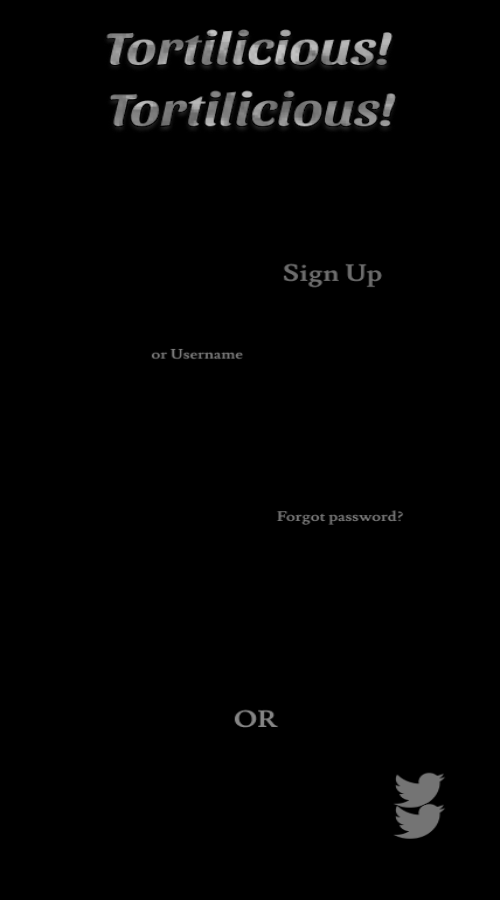

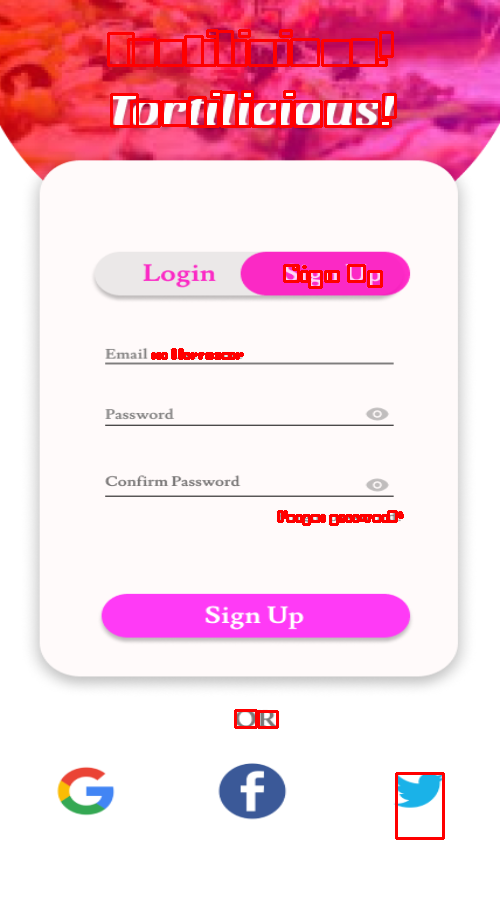

In [21]:
# Resize images to the same dimensions
width = 500
height = 900
image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))

# Convert images to grayscale
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute image difference
difference = cv2.absdiff(image1_gray, image2_gray)

# Apply thresholding to highlight significant differences
threshold = cv2.threshold(difference, 85, 255, cv2.THRESH_BINARY)[1]

# Find contours of the difference regions
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around each detected difference on image1
highlighted_image = image1.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(highlighted_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the image with bounding boxes around each difference

cv2_imshow(difference)
cv2_imshow(highlighted_image)


Next method : Structural Similarity Index Measure (SSIM)

In [18]:
from skimage.metrics import structural_similarity
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def image_compare(before, after):
    # Resize images to the same dimensions
    height, width = 1000, 600  # Define the desired dimensions
    before = cv2.resize(before, (width, height))
    after = cv2.resize(after, (width, height))

    # Convert images to grayscale
    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between the two images
    (score, diff) = structural_similarity(before_gray, after_gray, full=True)
    print("Image Similarity: {:.4f}%".format(score * 100))

    # The diff image contains the actual image differences between the two images and is represented as a floating point data type in the range [0,1]
    # so we must convert the array to 8-bit unsigned integers in the range [0,255] before we can use it with OpenCV
    diff = (diff * 255).astype("uint8")
    diff_box = cv2.merge([diff, diff, diff])

    # Threshold the difference image, followed by finding contours toobtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 150, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    filled_after = after.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area > 800:
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(before, (x, y), (x + w, y + h), (36, 255, 12), 2)
            cv2.rectangle(after, (x, y), (x + w, y + h), (36, 255, 12), 2)
            cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36, 255, 12), 2)
            cv2.rectangle(filled_after, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return cv2_imshow(filled_after)


Image Similarity: 94.3935%


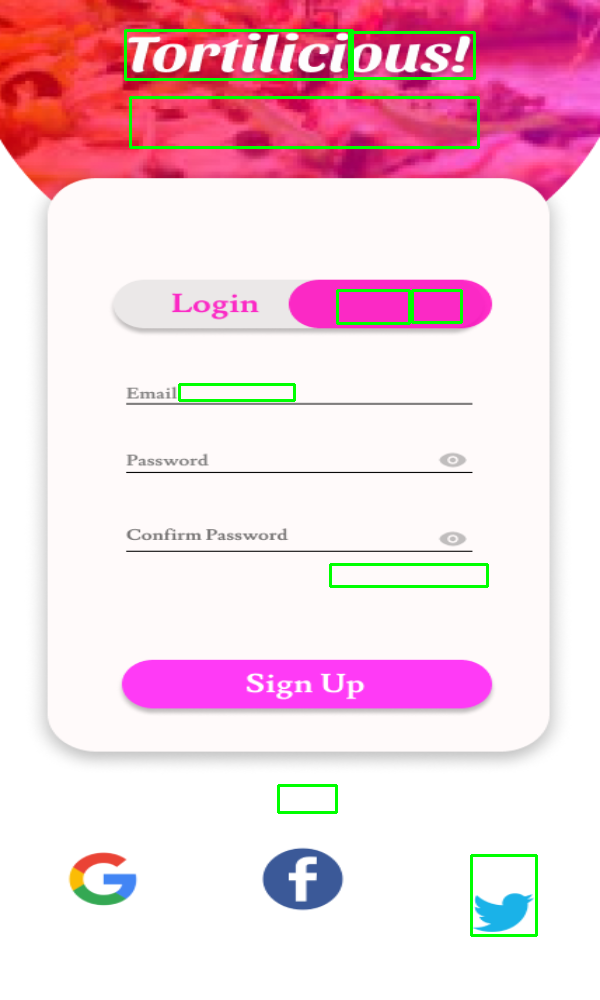

In [22]:
# Load images
before = cv2.imread('/content/input1.png')
after = cv2.imread('/content/input2.png')
image_compare(before, after)

Image Similarity: 95.7895%


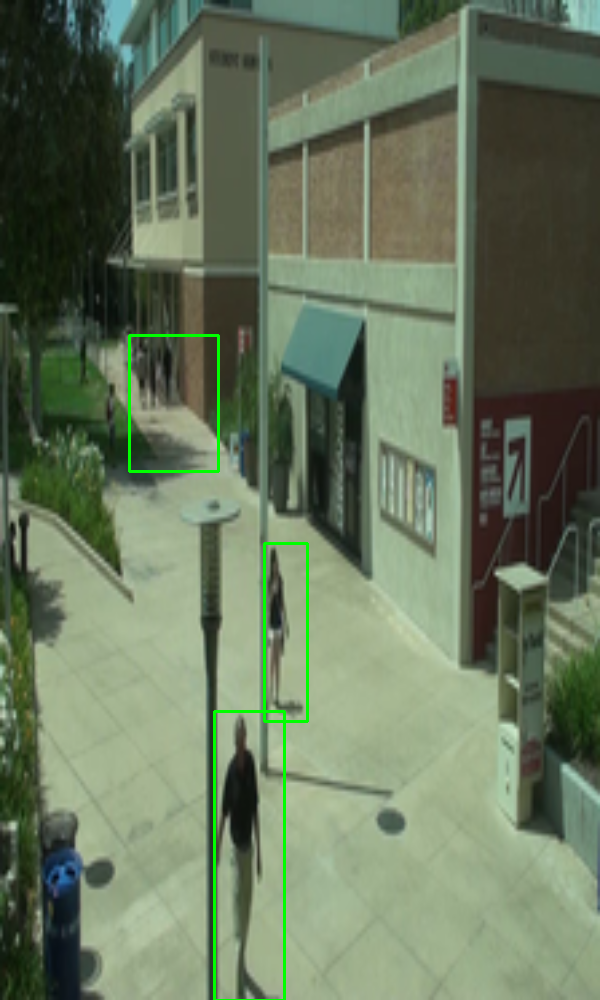

In [14]:
# Load images
before = cv2.imread('/content/9045.png')
after = cv2.imread('/content/9045_2.png')
image_compare(before, after)

Image Similarity: 95.7194%


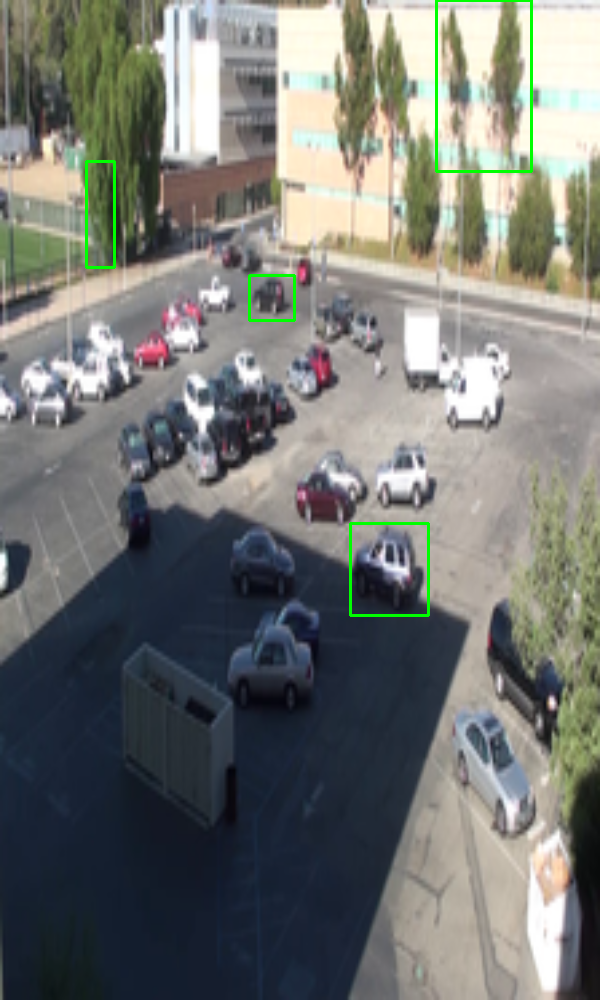

In [19]:
# Load images
before = cv2.imread('/content/11640.png')
after = cv2.imread('/content/11640_2.png')
image_compare(before, after)